In [236]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from csv_to_dataframes import joined_table, imdb_title_crew_df, imdb_principles_df

In [95]:
joined_table['foreign_gross'] = joined_table['worldwide_gross'] - joined_table['domestic_gross']

In [97]:
noZero_gross = joined_table.loc[(joined_table.domestic_gross>0.0)&(joined_table.worldwide_gross>0) ]
noZero_gross.averagerating.describe()

count    2469.000000
mean        6.354435
std         1.113190
min         1.600000
25%         5.700000
50%         6.400000
75%         7.100000
max         9.300000
Name: averagerating, dtype: float64

In [238]:
crew_grosses_df = pd.merge(noZero_gross,imdb_title_crew_df,how='inner',on='tconst')

In [243]:
principles_grosses_df = pd.merge(noZero_gross,imdb_principles_df,how='inner',on='tconst')


nconst
nm0000035     -16.447875
nm0000041      80.583507
nm0000084     408.053436
nm0000092     103.463298
nm0000093     175.520755
                ...     
nm9981631     -73.154585
nm9987883     263.120550
nm9989231    1004.104198
nm9989238    1004.104198
nm9993494     -57.263041
Name: percent_gross, Length: 19030, dtype: float64

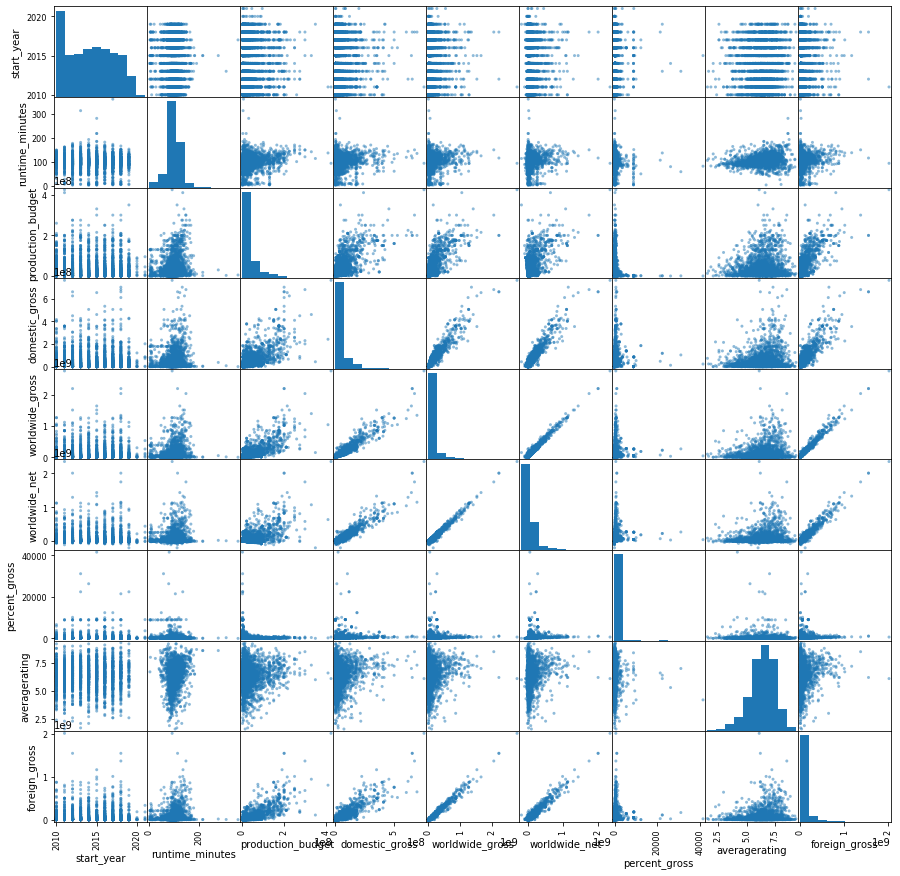

In [98]:
matrix = pd.plotting.scatter_matrix(noZero_gross, figsize=(15,15))

0.21184424171797178


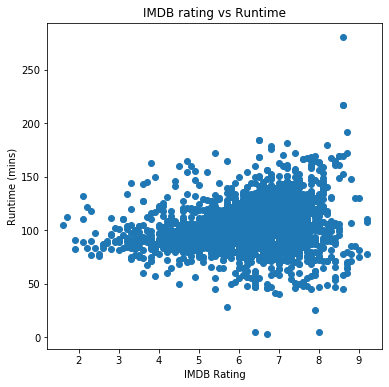

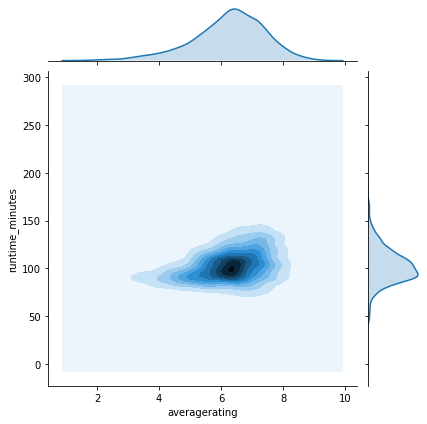

In [99]:
run_rate_corr = joined_table.runtime_minutes.corr(joined_table.averagerating)
print(run_rate_corr)
figure1, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
ax.scatter(joined_table.averagerating,joined_table.runtime_minutes);
ax.set_title('IMDB rating vs Runtime')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Runtime (mins)')
sns.jointplot(x=joined_table.averagerating,y=joined_table.runtime_minutes,kind="kde")

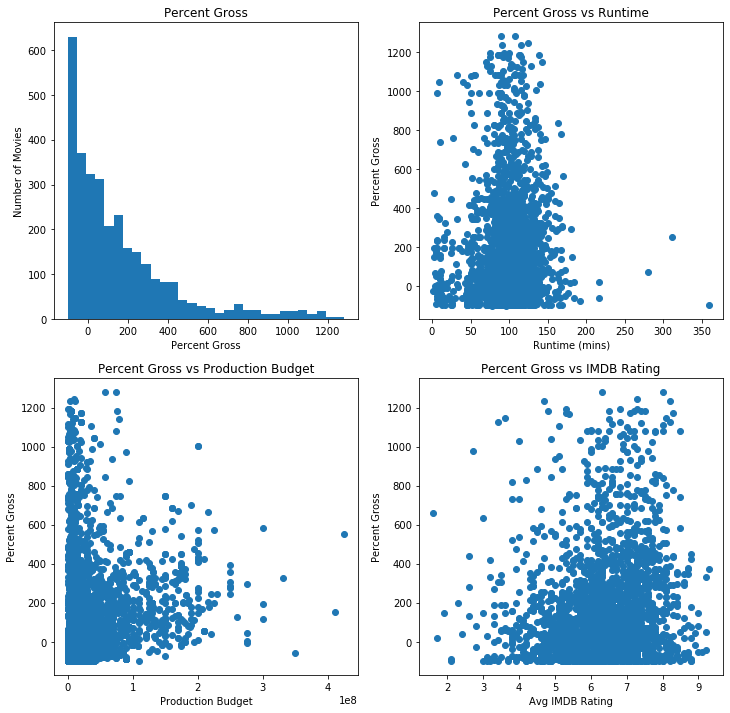

In [212]:
figure2, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

#Plots for percent gross
#Eliminate outliers via quantile
outlier_tolerance_pgross = noZero_gross.percent_gross.quantile(.95)

#histogram
ax[0][0].hist(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross, bins=30);
#ax[0][0].hist(noZero_gross.percent_gross, bins=50);
label_chart(ax[0][0],title='Percent Gross',xlabel='Percent Gross',ylabel='Number of Movies')

#scatter vs runtime
ax[0][1].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].runtime_minutes,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[0][1],title='Percent Gross vs Runtime',xlabel='Runtime (mins)',ylabel='Percent Gross')

#scatter vs production. budget
ax[1][0].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].production_budget,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[1][0],title='Percent Gross vs Production Budget',xlabel='Production Budget',ylabel='Percent Gross')

#scatter vs avg rating
ax[1][1].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].averagerating,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[1][1],title='Percent Gross vs IMDB Rating',xlabel='Avg IMDB Rating',ylabel='Percent Gross')

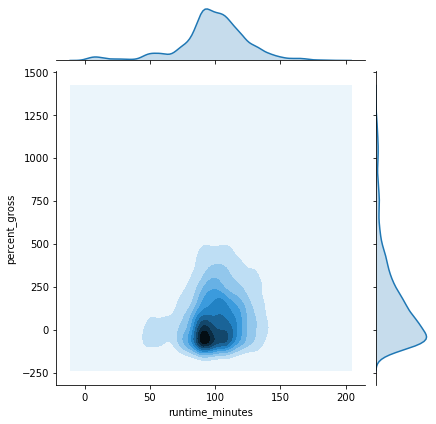

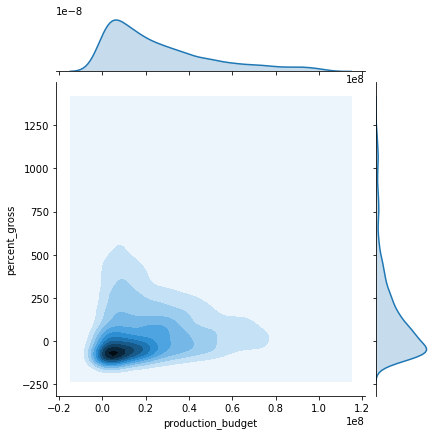

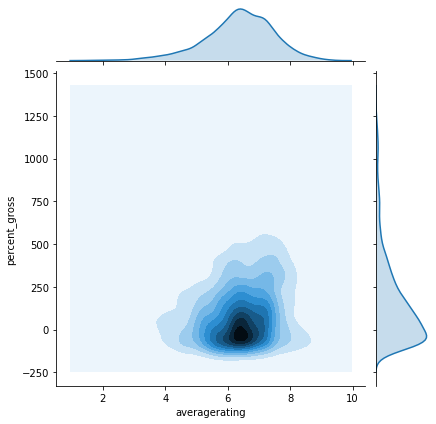

In [213]:
#Estimate Densities to find the typical movie
sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.runtime_minutes <=200)].runtime_minutes,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.runtime_minutes <=200)].percent_gross, 
              kind="kde")

sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].production_budget,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].percent_gross,
              kind="kde")

sns.jointplot(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].averagerating,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross, kind="kde")

In [102]:
noZero_gross.production_budget.corr(noZero_gross.percent_gross)

-0.09681818114271215

In [103]:
noZero_gross.head()

,tconst,primary_title,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross,averagerating,foreign_gross
33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0
40,tt0326592,The Overnight,2010,88.0,NaN,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0
48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",25000000.0,720828.0,9313302.0,-15686698.0,-62.746792,6.1,8592474.0
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",91000000.0,58236838.0,187861183.0,96861183.0,106.440860,7.3,129624345.0
58,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",28000000.0,26017685.0,62108587.0,34108587.0,121.816382,6.5,36090902.0


In [104]:
def label_chart(ax,title=None,xlabel=None,ylabel=None):
    """
    Sets title and labels on a given axes
    """
    if title:
        ax.set_title(title)
        
    if xlabel:
        ax.set_xlabel(xlabel)
    
    if ylabel:
        ax.set_ylabel(ylabel)
        
    return None

490856498.9999995

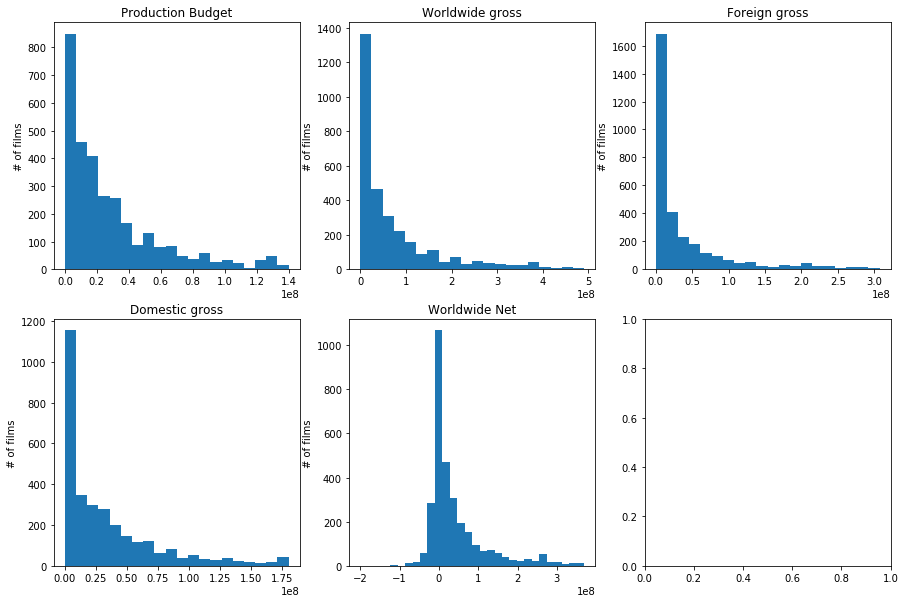

In [214]:
#Outsider Tolerances
outlier_tolerance_wgross = noZero_gross.worldwide_gross.quantile(.95)
outlier_tolerance_wnet = noZero_gross.worldwide_net.quantile(.95)
outlier_tolerance_fgross = noZero_gross.foreign_gross.quantile(.95)
outlier_tolerance_dgross = noZero_gross.domestic_gross.quantile(.95)
outlier_tolerance_budget = noZero_gross.production_budget.quantile(.95)

figure3, ax1 = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
ax1[0][0].hist(noZero_gross.loc[noZero_gross.production_budget<outlier_tolerance_budget].production_budget,bins=20)
label_chart(ax1[0][0],title='Production Budget',ylabel='# of films')

ax1[0][1].hist(noZero_gross.loc[noZero_gross.worldwide_gross<outlier_tolerance_wgross].worldwide_gross,bins=20)
label_chart(ax1[0][1],title='Worldwide gross',ylabel='# of films')

ax1[1][0].hist(noZero_gross.loc[noZero_gross.domestic_gross<outlier_tolerance_dgross].domestic_gross,bins=20)
label_chart(ax1[1][0],title='Domestic gross',ylabel='# of films')

ax1[1][1].hist(noZero_gross.loc[noZero_gross.worldwide_net<outlier_tolerance_wnet].worldwide_net,bins=30)
label_chart(ax1[1][1],title='Worldwide Net',ylabel='# of films')

ax1[0][2].hist(noZero_gross.loc[noZero_gross.foreign_gross<outlier_tolerance_fgross].foreign_gross,bins=20)
label_chart(ax1[0][2],title='Foreign gross',ylabel='# of films')

noZero_gross.worldwide_gross.quantile(.95)

0.8724314843103015

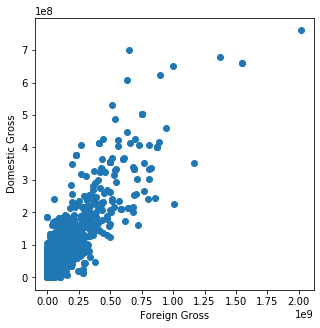

In [221]:
figure4, ax4 = plt.subplots(figsize=(5,5))
plt.scatter(noZero_gross.foreign_gross,noZero_gross.domestic_gross);
label_chart(ax4,xlabel='Foreign Gross',ylabel='Domestic Gross')
noZero_gross.foreign_gross.corr(noZero_gross.domestic_gross)#High Correlation between domestic and foreign grosses

0.09564805041760481

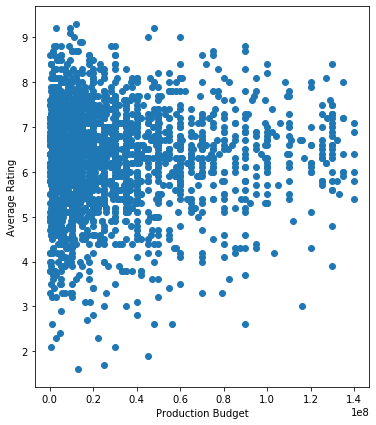

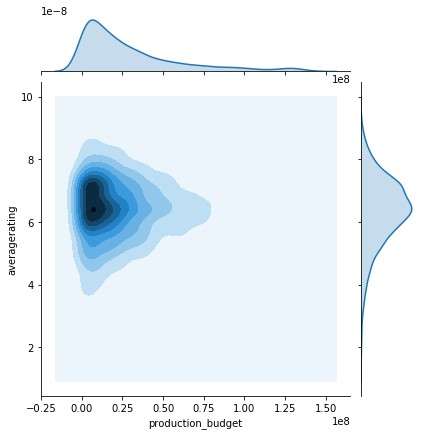

In [227]:
figure5, ax5 = plt.subplots(figsize=(6,7))
plt.scatter(noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].production_budget,
            noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].averagerating);
label_chart(ax5,xlabel='Production Budget',ylabel='Average Rating')

sns.jointplot(noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].production_budget,
              noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].averagerating, kind='kde')

noZero_gross.production_budget.corr(noZero_gross.averagerating) #little correlation so spend less money

-0.028201270927444063

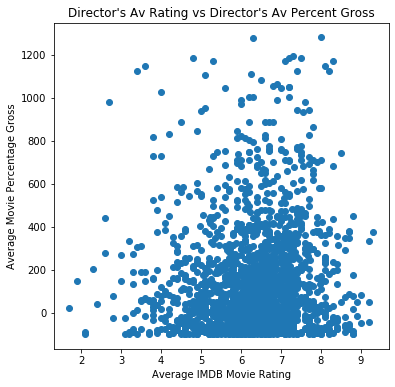

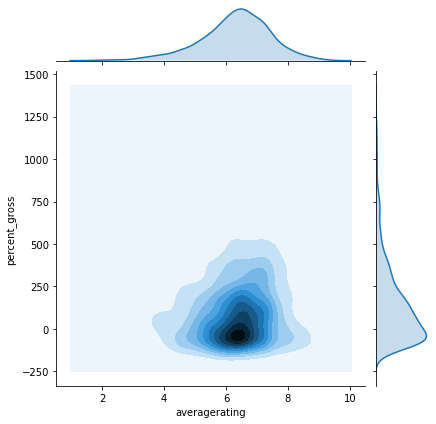

In [239]:
figure6, ax6 = plt.subplots(figsize=(6,6))

ax6.scatter(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').percent_gross.mean());
label_chart(ax6,title="Director's Av Rating vs Director's Av Percent Gross", xlabel='Average IMDB Movie Rating', 
            ylabel='Average Movie Percentage Gross')

sns.jointplot(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').percent_gross.mean(),kind='kde');

#very weak negative correlation --> could imply some relation to a good director being expensive
crew_grosses_df.groupby('directors').percent_gross.mean().corr(crew_grosses_df.groupby('directors').averagerating.mean())

In [176]:
crew_grosses_df.percent_gross.quantile(.95)

1281.9323159403439

-0.013612204941014113

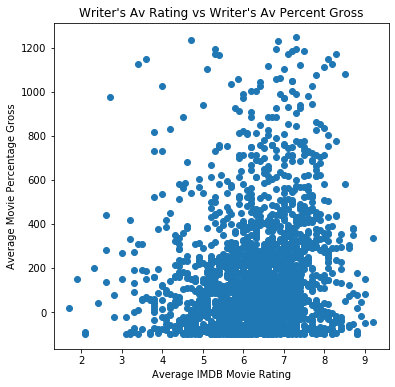

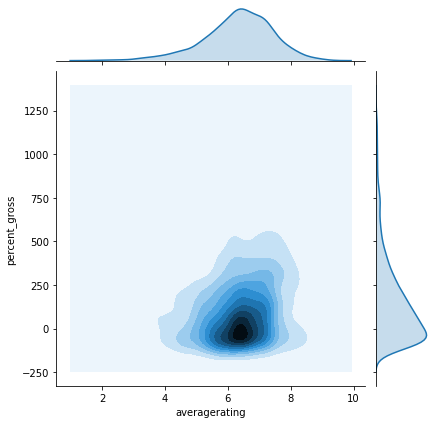

In [247]:
figure7, ax7 = plt.subplots(figsize=(6,6))

plt.scatter(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').percent_gross.mean());
label_chart(ax7,title="Writer's Av Rating vs Writer's Av Percent Gross", xlabel='Average IMDB Movie Rating', 
            ylabel='Average Movie Percentage Gross')
sns.jointplot(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').percent_gross.mean(),kind='kde');

#very weak negative correlation --> could imply small relation to a good scripts being expensive
crew_grosses_df.groupby('writers').percent_gross.mean().corr(crew_grosses_df.groupby('writers').averagerating.mean())


-0.03571625153508903

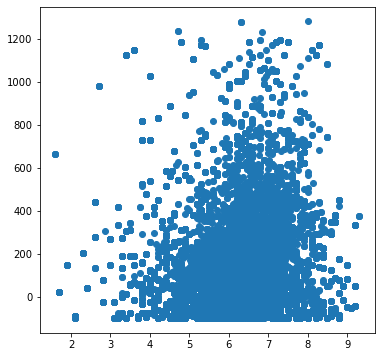

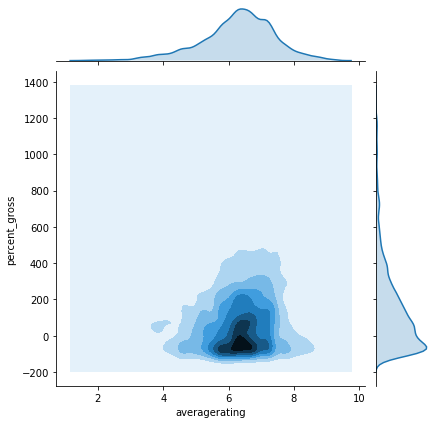

In [249]:
principles_grosses_df.groupby('nconst').percent_gross.mean()

figure8, ax8 = plt.subplots(figsize=(6,6))

plt.scatter(principles_grosses_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').averagerating.mean(),
            principles_grosses_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').percent_gross.mean());
label_chart(ax7,title="Actor's Movie Av Rating vs Acors's Movie Av Percent Gross", xlabel='Average IMDB Movie Rating', 
            ylabel='Average Movie Percentage Gross')
sns.jointplot(principles_grosses_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').averagerating.mean(),
            principles_grosses_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').percent_gross.mean(),kind='kde');

#very weak negative correlation --> could imply small relation to a big name actors being expensive
principles_grosses_df.groupby('nconst').percent_gross.mean().corr(principles_grosses_df.groupby('nconst').averagerating.mean())
